In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
%matplotlib inline
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from time import time
import scipy.fftpack # For FFT2 

In [2]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

def change_color_kmeans(predict_img, clusters):
    img = []
    for val in predict_img:
        img.append(clusters[val])
    return img

def change_color_fuzzycmeans(cluster_membership, clusters):
    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img

def readimage():
    folder = 'image/'
    list_images = os.listdir(folder)
    list_img = []
    for i in list_images:
        path = folder+i
        print(path)
        img = cv2.imread(path)
#         print(img.shape)
#         img = cv2.resize(img, (600,600))
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 3))
        list_img.append(rgb_img)
        
    return list_img

def bwarea(img):
    row = img.shape[0]
    col = img.shape[1]
    total = 0.0
    for r in range(row-1):
        for c in range(col-1):
            sub_total = img[r:r+2, c:c+2].mean()
            if sub_total == 255:
                total += 1
            elif sub_total == (255.0/3.0):
                total += (7.0/8.0)
            elif sub_total == (255.0/4.0):
                total += 0.25
            elif sub_total == 0:
                total += 0
            else:
                r1c1 = img[r,c]
                r1c2 = img[r,c+1]
                r2c1 = img[r+1,c]
                r2c2 = img[r+1,c+1]
                
                if (((r1c1 == r2c2) & (r1c2 == r2c1)) & (r1c1 != r2c1)):
                    total += 0.75
                else:
                    total += 0.5
    return total
            
            

In [3]:
list_img = readimage()
clusters = 6
n_data = len(list_img)

image/2.png
image/5.png
image/8.png
image/rock1.jpg
image/rock2.jpg
image/rock3.jpg
image/sky1.jpeg
image/sky2.jpeg
image/sky3.jpeg


1.9533276557922363 seconds
1328.5
2.515923023223877 seconds
127.75
2.1424994468688965 seconds
7429.75


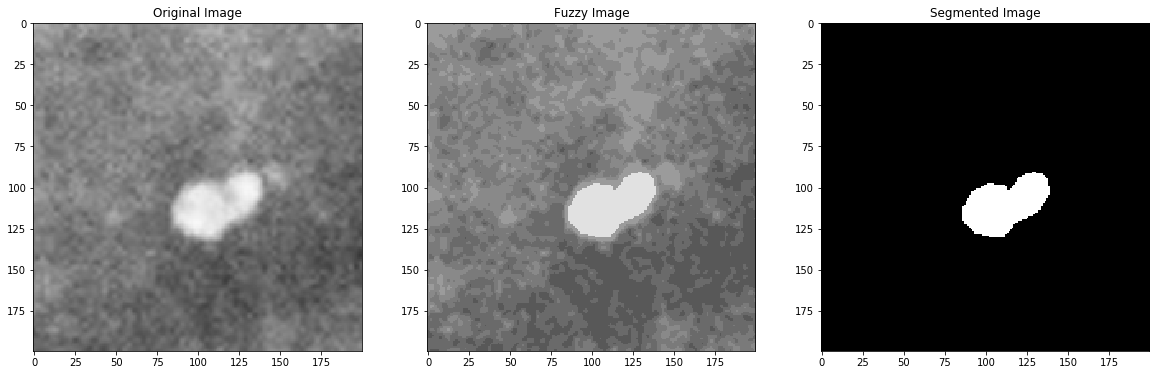

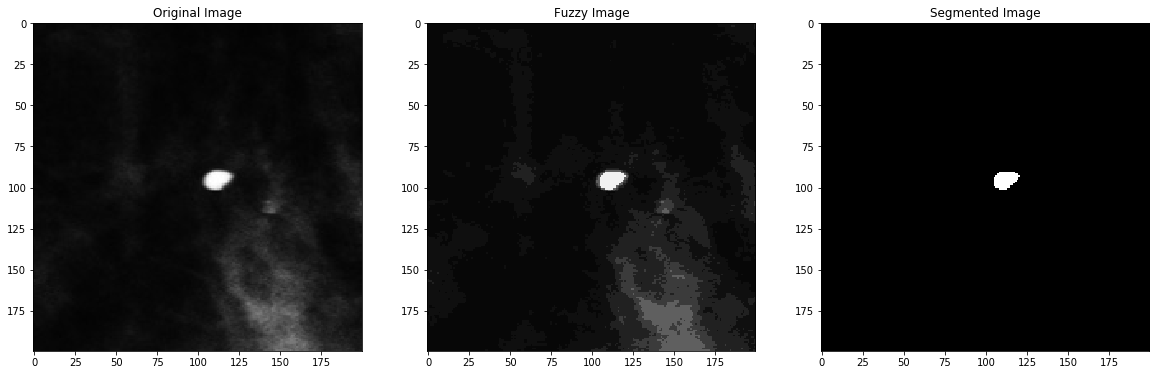

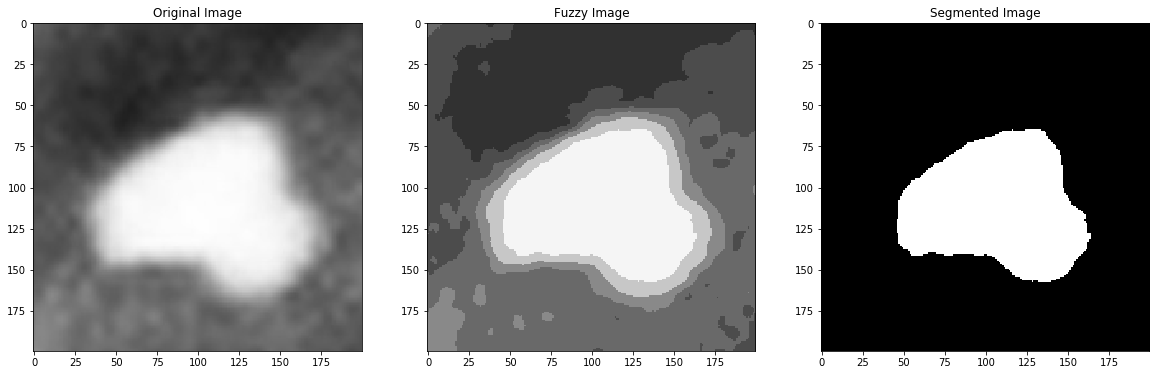

In [5]:
for rgb_img in list_img[:3]:
    
    img = np.reshape(rgb_img, (200,200,3)).astype(np.uint8)
    shape = np.shape(img)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     ret, img = cv2.threshold(img, 170 , 250, cv2.THRESH_BINARY)
#     print(img)
#     ret, level = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#     ret, bwfim = cv2.threshold(level,127,255,cv2.THRESH_BINARY)
#     rgb_img = bwfim.reshape((img.shape[0] * img.shape[1], 1))
    
#     KMEANS
    clt = KMeans(n_clusters = clusters, n_jobs=4)
    clt.fit(rgb_img)
    predict_img = clt.predict(rgb_img)
    new_img = change_color_kmeans(predict_img, clt.cluster_centers_)
    kmeans_img = np.reshape(new_img, shape).astype(np.uint8)
    
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    # Fuzzy C Means
    new_time = time()
    
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    rgb_img.T, clusters, 2, error=0.005, maxiter=1000, init=None,seed=42)
    
    new_img = change_color_fuzzycmeans(u,cntr)
    fuzzy_img = np.reshape(new_img,shape).astype(np.uint8)
    ret, seg_img = cv2.threshold(fuzzy_img,np.max(fuzzy_img)-1,255,cv2.THRESH_BINARY)
    print(time() - new_time,'seconds')
    
    print(bwarea(seg_img[:,:,1]))
    
    # show our color bart
    
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(img)
    plt.title('Original Image')
    
    
    plt.subplot(132)
    plt.imshow(fuzzy_img)
    plt.title('Fuzzy Image')
    
    plt.subplot(133)
    plt.imshow(seg_img)
    plt.title('Segmented Image')
    
#     cv2.imshow('original', img)
#     cv2.imshow('bar_kmeans',bar)
#     cv2.imshow('seg_img', seg_img)
#     cv2.imshow('kmeans',kmeans_img)
#     cv2.imshow('fuzzy',fuzzy_img)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
for rgb_img in list_img:
    
    img = np.reshape(rgb_img, (600,600,3)).astype(np.uint8)
    
    # KMEANS
    clt = KMeans(n_clusters = 3)
    clt.fit(rgb_img)
    predict_img = clt.predict(rgb_img)
    new_img = change_color_kmeans(predict_img, clt.cluster_centers_)
    kmeans_img = np.reshape(new_img, (600,600,3)).astype(np.uint8)
    
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    # show our color bart
    cv2.imshow('original', img)
    cv2.imshow('bar',bar)
    cv2.imshow('kmeans',kmeans_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
for rgb_img in list_img:
    
    img = np.reshape(rgb_img, (600,600,3)).astype(np.uint8)
    
    # Fuzzy C Means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    rgb_img.T, 3, 2, error=0.005, maxiter=1000, init=None,seed=42)
    
    new_img = change_color_fuzzycmeans(u,cntr)
    fuzzy_img = np.reshape(new_img,(600,600,3)).astype(np.uint8)
    
    cv2.imshow('original', img)
    cv2.imshow('fuzzy',fuzzy_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()